In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
df = pd.concat([train.drop('SalePrice',axis=1),test],ignore_index=True)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [4]:
#check what needs to be fixed and copy/paste
fix = list(df.loc[:, df.isnull().any()])
for i in range(len(fix)):
    print('df[\''+fix[i]+'\']','=','df[\''+fix[i]+'\']'+'.fillna()')

df['MSZoning'] = df['MSZoning'].fillna()
df['LotFrontage'] = df['LotFrontage'].fillna()
df['Alley'] = df['Alley'].fillna()
df['Utilities'] = df['Utilities'].fillna()
df['Exterior1st'] = df['Exterior1st'].fillna()
df['Exterior2nd'] = df['Exterior2nd'].fillna()
df['MasVnrType'] = df['MasVnrType'].fillna()
df['MasVnrArea'] = df['MasVnrArea'].fillna()
df['BsmtQual'] = df['BsmtQual'].fillna()
df['BsmtCond'] = df['BsmtCond'].fillna()
df['BsmtExposure'] = df['BsmtExposure'].fillna()
df['BsmtFinType1'] = df['BsmtFinType1'].fillna()
df['BsmtFinSF1'] = df['BsmtFinSF1'].fillna()
df['BsmtFinType2'] = df['BsmtFinType2'].fillna()
df['BsmtFinSF2'] = df['BsmtFinSF2'].fillna()
df['BsmtUnfSF'] = df['BsmtUnfSF'].fillna()
df['TotalBsmtSF'] = df['TotalBsmtSF'].fillna()
df['Electrical'] = df['Electrical'].fillna()
df['BsmtFullBath'] = df['BsmtFullBath'].fillna()
df['BsmtHalfBath'] = df['BsmtHalfBath'].fillna()
df['KitchenQual'] = df['KitchenQual'].fillna()
df['Functional'] = df['Functional'].fillna()
df['Fi

In [5]:
#start by picking off some of the easy ones

In [6]:
df.Alley = df.Alley.fillna('NA')

In [7]:
df.BsmtQual = df.BsmtQual.fillna('NA')

In [8]:
df.MasVnrType = df.MasVnrType.fillna('NA')

In [9]:
df.MasVnrArea = df.MasVnrArea.fillna(0)

In [10]:
df.BsmtCond = df.BsmtCond.fillna('NA')

In [11]:
df.BsmtExposure = df.BsmtExposure.fillna('NA')

In [12]:
df.BsmtFinType1 = df.BsmtFinType1.fillna('NA')

In [13]:
df.BsmtFinType2 = df.BsmtFinType1.fillna('NA')

In [14]:
df.Electrical = df.Electrical.fillna(df.Electrical.mode()[0])

In [15]:
df.FireplaceQu = df.FireplaceQu.fillna('NA')

In [16]:
df.GarageType = df.GarageType.fillna('NA')

In [17]:
df.GarageYrBlt = df.GarageYrBlt.fillna('NA')
#want this to be treated as a discrete value so upcast to object and impute NA?

In [18]:
df.GarageFinish = df.GarageFinish.fillna('NA')

In [19]:
df.GarageQual = df.GarageQual.fillna('NA')

In [20]:
df.GarageCond = df.GarageCond.fillna('NA')

In [21]:
df.PoolQC = df.PoolQC.fillna('NA')

In [22]:
df.Fence = df.Fence.fillna('NA')

In [23]:
df.MiscFeature = df.MiscFeature.fillna('NA')

In [24]:
#check again
fix = list(df.loc[:, df.isnull().any()])
for i in range(len(fix)):
    print('df[\''+fix[i]+'\']','=','df[\''+fix[i]+'\']'+'.fillna()')

df['MSZoning'] = df['MSZoning'].fillna()
df['LotFrontage'] = df['LotFrontage'].fillna()
df['Utilities'] = df['Utilities'].fillna()
df['Exterior1st'] = df['Exterior1st'].fillna()
df['Exterior2nd'] = df['Exterior2nd'].fillna()
df['BsmtFinSF1'] = df['BsmtFinSF1'].fillna()
df['BsmtFinSF2'] = df['BsmtFinSF2'].fillna()
df['BsmtUnfSF'] = df['BsmtUnfSF'].fillna()
df['TotalBsmtSF'] = df['TotalBsmtSF'].fillna()
df['BsmtFullBath'] = df['BsmtFullBath'].fillna()
df['BsmtHalfBath'] = df['BsmtHalfBath'].fillna()
df['KitchenQual'] = df['KitchenQual'].fillna()
df['Functional'] = df['Functional'].fillna()
df['GarageCars'] = df['GarageCars'].fillna()
df['GarageArea'] = df['GarageArea'].fillna()
df['SaleType'] = df['SaleType'].fillna()


In [25]:
df['Utilities'] = df['Utilities'].fillna(df.Utilities.mode()[0])

In [26]:
df['Exterior1st'] = df['Exterior1st'].fillna(df.Exterior1st.mode()[0])

In [27]:
df['Exterior2nd'] = df['Exterior2nd'].fillna(df.Exterior2nd.mode()[0])

In [28]:
df['BsmtFinSF1'] = df['BsmtFinSF1'].fillna(0)

In [29]:
df['BsmtFinSF2'] = df['BsmtFinSF2'].fillna(0)

In [30]:
df['BsmtUnfSF'] = df['BsmtUnfSF'].fillna(0)

In [31]:
df['TotalBsmtSF'] = df['TotalBsmtSF'].fillna(0)

In [32]:
df['BsmtFullBath'] = df['BsmtFullBath'].fillna(0)

In [33]:
df['BsmtHalfBath'] = df['BsmtHalfBath'].fillna(0)

In [34]:
#check again
fix = list(df.loc[:, df.isnull().any()])
for i in range(len(fix)):
    print('df[\''+fix[i]+'\']','=','df[\''+fix[i]+'\']'+'.fillna()')

df['MSZoning'] = df['MSZoning'].fillna()
df['LotFrontage'] = df['LotFrontage'].fillna()
df['KitchenQual'] = df['KitchenQual'].fillna()
df['Functional'] = df['Functional'].fillna()
df['GarageCars'] = df['GarageCars'].fillna()
df['GarageArea'] = df['GarageArea'].fillna()
df['SaleType'] = df['SaleType'].fillna()


In [35]:
df['Functional'] = df['Functional'].fillna(df.Functional.mode()[0])

In [36]:
df['SaleType'] = df['SaleType'].fillna(df.SaleType.mode()[0])

In [37]:
df['GarageCars'] = df['GarageCars'].fillna(0)

In [38]:
df['GarageArea'] = df['GarageArea'].fillna(0)

In [39]:
#check again
fix = list(df.loc[:, df.isnull().any()])
for i in range(len(fix)):
    print('df[\''+fix[i]+'\']','=','df[\''+fix[i]+'\']'+'.fillna()')

df['MSZoning'] = df['MSZoning'].fillna()
df['LotFrontage'] = df['LotFrontage'].fillna()
df['KitchenQual'] = df['KitchenQual'].fillna()


In [40]:
df['KitchenQual'] = df['KitchenQual'].fillna(df.KitchenQual.mode()[0])

In [41]:
df['MSZoning'] = df['MSZoning'].fillna(df.MSZoning.mode()[0])

In [42]:
#everything except lotfrontage is handled, but to avoid information leakage I will separate training and test data
#before interpolating

In [43]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,GLQ,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NA,NA,NA,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,ALQ,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NA,NA,NA,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,GLQ,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NA,NA,NA,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,ALQ,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NA,NA,NA,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,GLQ,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NA,NA,NA,0,12,2008,WD,Normal
5,6,50,RL,85.0,14115,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732.0,GLQ,0.0,64.0,796.0,GasA,Ex,Y,SBrkr,796,566,0,1362,1.0,0.0,1,1,1,1,TA,5,Typ,0,NA,Attchd,1993,Unf,2.0,480.0,TA,TA,Y,40,30,0,320,0,0,NA,MnPrv,Shed,700,10,2009,WD,Normal
6,7,20,RL,75.0,10084,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369.0,GLQ,0.0,317.0,1686.0,GasA,Ex,Y,SBrkr,1694,0,0,1694,1.0,0.0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004,RFn,2.0,636.0,TA,TA,Y,255,57,0,0,0,0,NA,NA,NA,0,8,2007,WD,Normal
7,8,60,RL,NaN,10382,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859.0,ALQ,32.0,216.0,1107.0,GasA,Ex,Y,SBrkr,1107,983,0,2090,1.0,0.0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973,RFn,2.0,484.0,TA,TA,Y,235,204,228,0,0,0,NA,NA,Shed,350,11,2009,WD,Normal
8,9,50,RM,51.0,6120,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,952.0,952.0,GasA,Gd,Y,FuseF,1022,752,0,1774,0.0,0.0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931,Unf,2.0,468.0,Fa,TA,Y,90,0,205,0,0,0,NA,NA,NA,0,4,2008,WD,Abnorml
9,10,190,RL,50.0,7420,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851.

In [44]:
df_train = df[df['Id'] <= 1460].copy()

In [45]:
df_test = df[df['Id'] >= 1461].copy()

In [46]:
#now fix LotFrontage for both the training and test data

In [47]:
#use the median from the training set for both imputations to avoid information leakage
df_train['LotFrontage'] = df_train.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
df_test['LotFrontage'] = df_train.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [48]:
#both datasets are now clean, but no feature engineering has been done

In [49]:
df_train['SalePrice'] = train['SalePrice'] 

# df_train and df_test are now imputed versions of both original data frames.  df_train still has the y variable as the last column

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
df_train.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.003381,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.051071,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.370367,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.003381,-0.370367,1.000000,0.335957,0.239546,-0.043595,0.120999,0.084550,0.195830,0.232576,0.052237,0.119174,0.381038,0.434109,0.075686,0.031873,0.385190,0.107226,0.006620,0.186561,0.054190,0.245232,-0.005627,0.332619,0.249295,0.281393,0.339085,0.088736,0.141734,0.008057,0.064654,0.041063,0.174567,0.005332,0.007370,0.004756,0.349876
LotArea,-0.033226,-0.139781,0.335957,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.239546,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.043595,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.120999,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.084550,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.051071,0.023573,0.195830,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,-0.071330,0.113862,0.360067,0.339850,0.173800,-0.068628,0.388052,0.083010,0.027403,0.272999,0.199108,0.102775,-0.038450,0.279568,0.247015,0.361945,0.370884,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614
BsmtFinSF1,-0.005024,-0.069836,0.232576,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


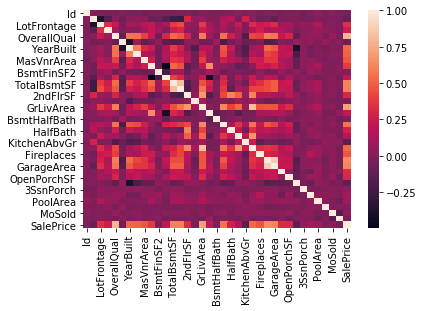

In [52]:
sns.heatmap(df_train.corr())

In [53]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

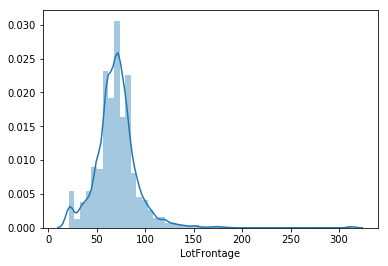

In [54]:
sns.distplot(df_train.LotFrontage)

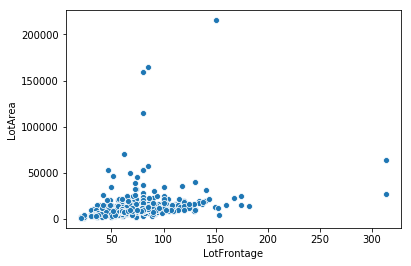

In [55]:
sns.scatterplot(x=df_train.LotFrontage, y=df_train.LotArea)

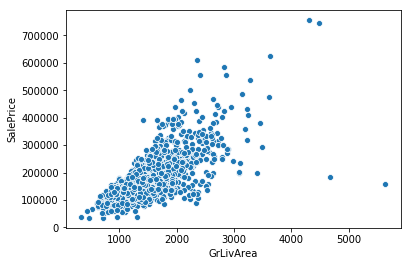

In [56]:
sns.scatterplot(x=df_train.GrLivArea, y=df_train.SalePrice)
#two outliers in the bottom right

In [57]:
df_train[(df_train.GrLivArea > 4000) & (df_train.SalePrice < 300000)]
#interesting two points, filtered out here so we can find if we want to remove later

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NA,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260.0,GLQ,0.0,878.0,3138.0,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1.0,0.0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007,Fin,3.0,884.0,TA,TA,Y,208,406,0,0,0,0,NA,NA,NA,0,10,2007,New,Partial,184750
1298,1299,60,RL,313.0,63887,Pave,NA,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644.0,GLQ,0.0,466.0,6110.0,GasA,Ex,Y,SBrkr,4692,950,0,5642,2.0,0.0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008,Fin,2.0,1418.0,TA,TA,Y,214,292,0,0,0,480,Gd,NA,NA,0,1,2008,New,Partial,160000


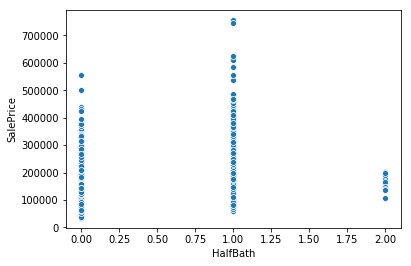

In [58]:
sns.scatterplot(x=df_train.HalfBath, y=df_train.SalePrice)

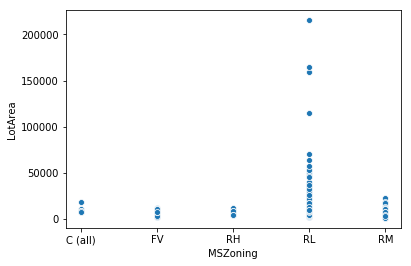

In [59]:
sns.scatterplot(x=df_train.MSZoning, y=df_train.LotArea)

In [64]:
df_train.select_dtypes(include='number').corrwith(df_train.SalePrice).sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.349876
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
dtype: float64

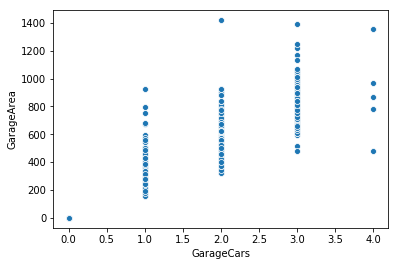

In [65]:
sns.scatterplot(x=df_train.GarageCars, y=df_train.GarageArea)
#88% correlation, get rid of garagecars

In [67]:
df_train.GarageQual.value_counts()
#maybe get rid of this too?

TA    1311
NA      81
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64

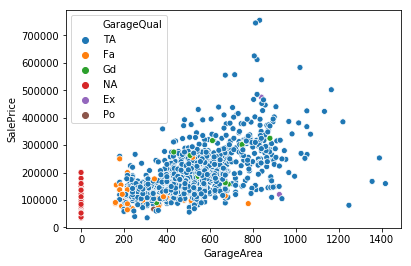

In [68]:
sns.scatterplot(x=df_train.GarageArea, y=df_train.SalePrice, hue = df_train.GarageQual)
#clear distinction between Fa and Gd, need to keep this

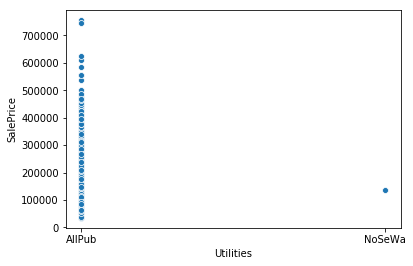

In [69]:
sns.scatterplot(x=df_train.Utilities, y=df_train.SalePrice)
#drop this

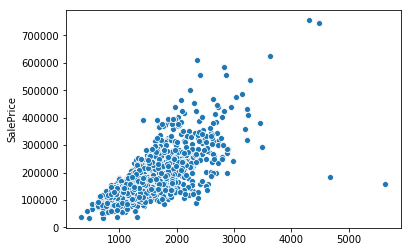

In [71]:
sns.scatterplot(x=(df_train['1stFlrSF'] + df_train['2ndFlrSF']), y=df_train.SalePrice)

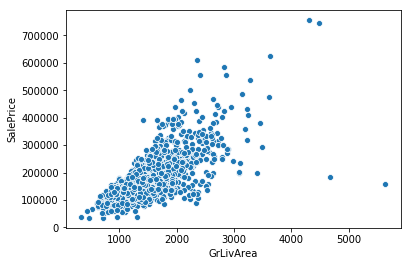

In [73]:
sns.scatterplot(x=df_train.GrLivArea, y=df_train.SalePrice)
#exact same graph, how do we interpret aggregating or leaving each floor separate?

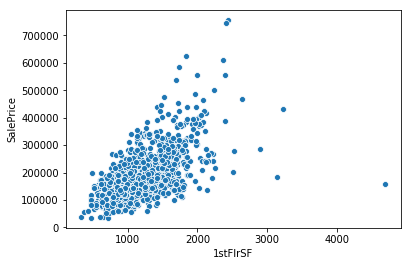

In [74]:
sns.scatterplot(x=df_train['1stFlrSF'], y=df_train.SalePrice)

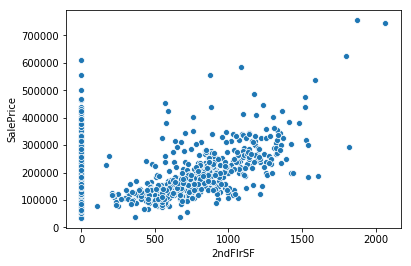

In [75]:
sns.scatterplot(x=df_train['2ndFlrSF'], y=df_train.SalePrice)
#lots of 1-story houses

In [77]:
df_train.Functional.value_counts()
#relatively low volume in non-Typ ,let's check the effect

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

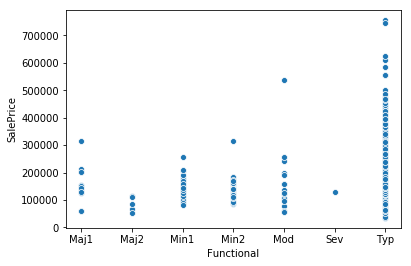

In [78]:
sns.scatterplot(x=df_train.Functional, y=df_train.SalePrice)

In [79]:
df_train.PavedDrive.value_counts()

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64

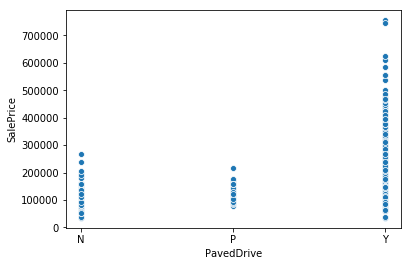

In [81]:
sns.scatterplot(x=df_train.PavedDrive, y=df_train.SalePrice)

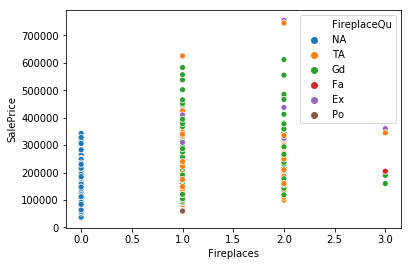

In [89]:
sns.scatterplot(x=df_train.Fireplaces, y=df_train.SalePrice, hue = df_train.FireplaceQu)
#number is hidden gem, but does quality matter?

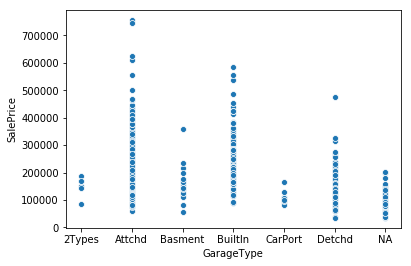

In [90]:
sns.scatterplot(x=df_train.GarageType, y=df_train.SalePrice)
#definite distinction between these

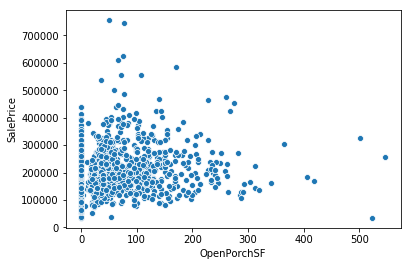

In [91]:
sns.scatterplot(x=df_train.OpenPorchSF, y=df_train.SalePrice)
#.32 corr shown above, but graph looks weird

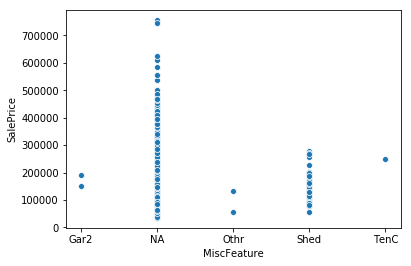

In [93]:
sns.scatterplot(x=df_train.MiscFeature, y=df_train.SalePrice)